# Title: Personalized Medical Recommendation System with Machine Learning

# Description:

Welcome to our cutting-edge Personalized Medical System, a powerful platform designed to assist users in understanding and managing thier health Leveraging the capabilities of machine learning, our system analyzes user-input symptoms to predict potentiol diseases accurately 

# Load Data Set & Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Dataset/Training.csv")

In [3]:
data.tail(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypothyroidism
4911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hyperthyroidism
4912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypoglycemia
4913,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Osteoarthristis
4914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Arthritis
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [4]:
data.shape

(4920, 133)

In [5]:
data["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

# Data Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [7]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
X = data.iloc[:,:-1]
y = data["prognosis"]

In [11]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [12]:
# Encoding Output Column Y

encoder = LabelEncoder()
Y = encoder.fit_transform(y)

In [13]:
Y

array([15, 15, 15, ..., 38, 35, 27])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 20)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3444, 132), (1476, 132), (3444,), (1476,))

# Traing top Models

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

LogisticRegression accuracy is : 1.0


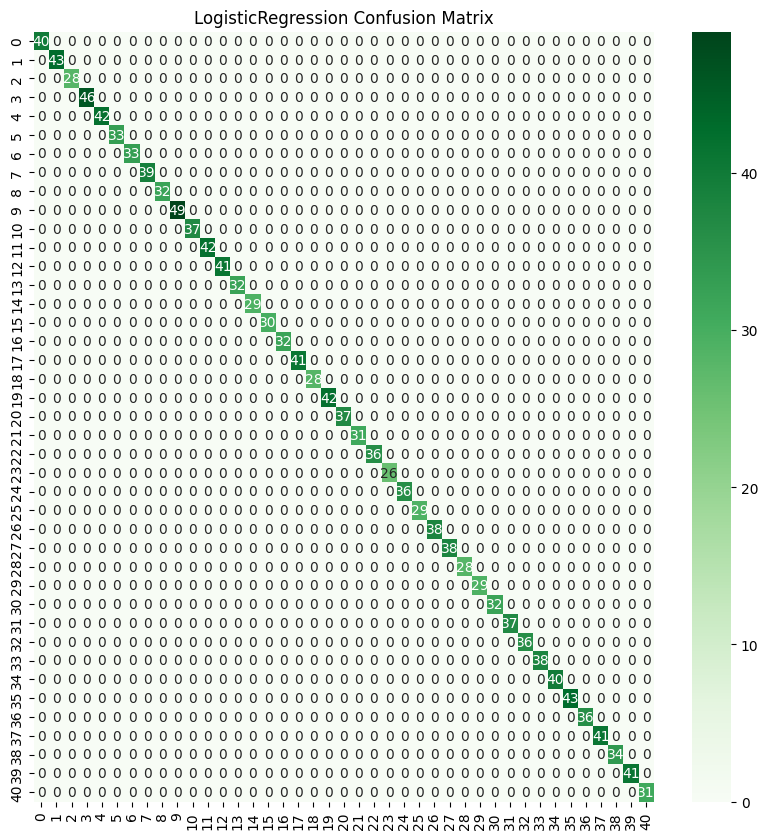

RandomForest accuracy is : 1.0


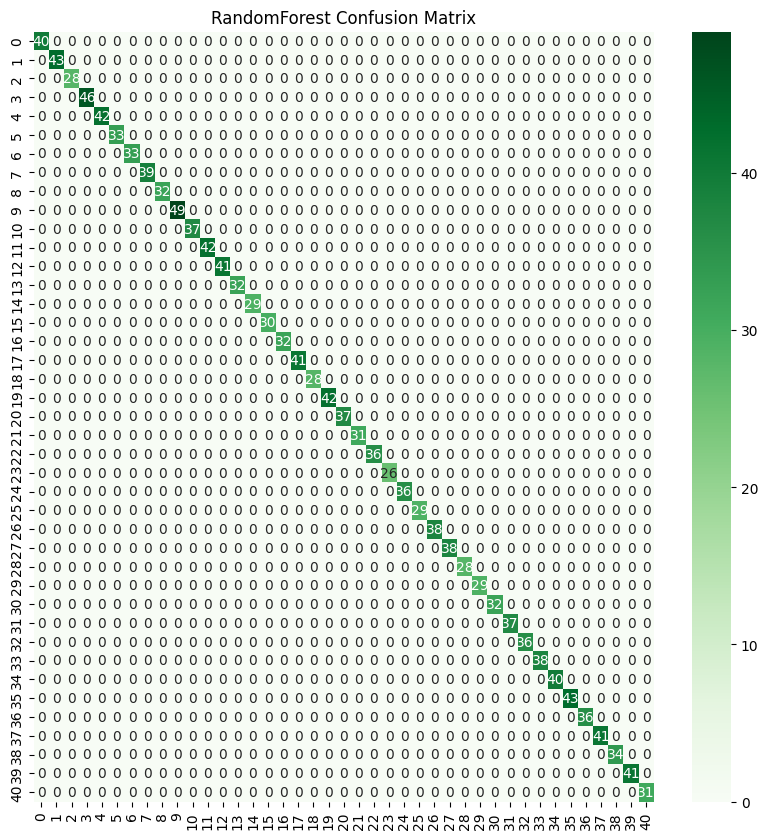

DecisionTree accuracy is : 0.9959349593495935


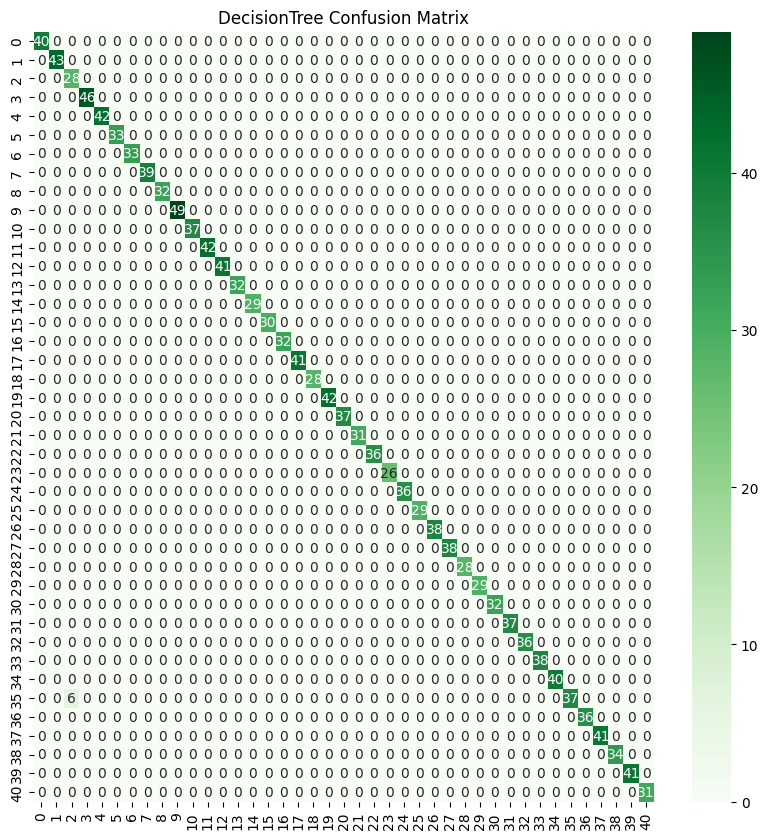

GradientBoost accuracy is : 1.0


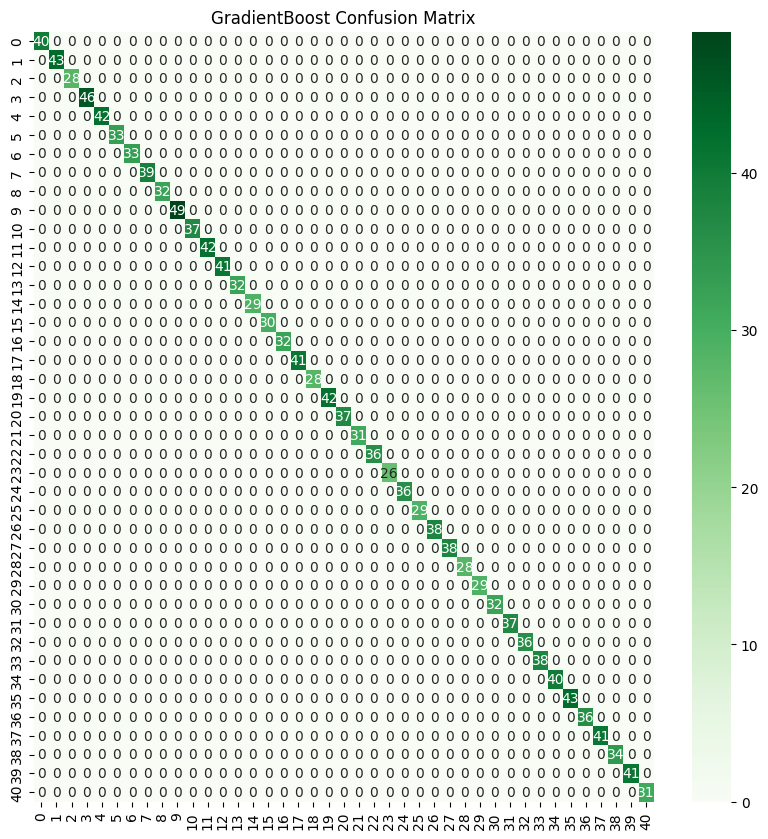

SVM accuracy is : 1.0


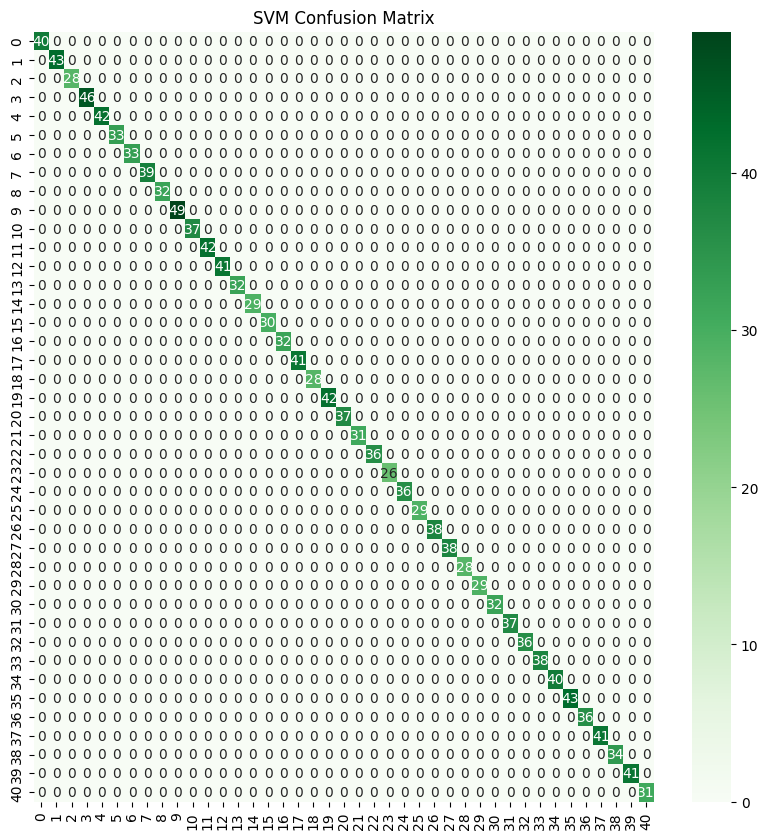

In [19]:
models = {
    "LogisticRegression" : LogisticRegression(random_state = 42),
    "RandomForest" : RandomForestClassifier(n_estimators = 100, random_state = 42),
    "DecisionTree" : DecisionTreeClassifier(criterion = "entropy", random_state = 42),
    "GradientBoost" : GradientBoostingClassifier(n_estimators = 100, random_state = 42),
    "SVM" : SVC(kernel = "linear")
    
}

for model_name, model in models.items():

    # train model
    model.fit(X_train, y_train)

    # test model
    predictions = model.predict(X_test)

    # calculate accuracy
    accuracy = accuracy_score(y_test, predictions)

    # confusion matrix with heat map
    
    cnf_matrix = confusion_matrix(y_test, predictions)

    print(f"{model_name} accuracy is : {accuracy}")

    plt.figure(figsize = (10,10))
    sns.heatmap(cnf_matrix, annot = True, fmt = "d", cmap = "Greens")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    

# Single Prediction for use

In [20]:
svc = SVC(kernel = "linear")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

# Save the model for Future use

In [21]:
import joblib 
joblib.dump(svc, "SVC_Model.joblib")

['SVC_Model.joblib']

In [22]:
# Load model
model = joblib.load("SVC_Model.joblib")

In [23]:
# test 1
print("Predicted Value: ",model.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Value: ", y_test[0])

Predicted Value:  [40]
Actual Value:  40


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [24]:
# Test 2
print("Predicted Value: ",model.predict(X_test.iloc[10].values.reshape(1,-1)))
print("Actual Value: ", y_test[10])

Predicted Value:  [20]
Actual Value:  20


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Recommendation System and Prediction


# Load Database and use logic for recommendation

In [25]:
precautaion = pd.read_csv("Dataset/precautions_df.csv")
workout = pd.read_csv("Dataset/workout_df.csv")
description = pd.read_csv("Dataset/description.csv")
medications = pd.read_csv("Dataset/medications.csv")
dieat = pd.read_csv("Dataset/diets.csv")

In [68]:
# ===============Custom and helping Function================

# ===================Helper Function=====================

def helper(dis):
    # Description about Disease 
    
    descr = description[description["Disease"] == dis]["Description"]
    descr = " ".join([w for w in descr])

    # Precuations about Disease

    pre = precautaion[precautaion["Disease"] == dis][["Precaution_1", "Precaution_2", "Precaution_3", "Precaution_4"]]
    pre = [col for col in pre.values]

    # Meditations About Disease

    med = medications[medications["Disease"] == dis]["Medication"]
    med = [medi for medi in med.values]

    #  Dieat About Disease

    diet = dieat[dieat["Disease"] == dis]["Diet"]
    diet = [die for die in diet.values]

    wrkout = workout[workout["disease"] == dis]["workout"]

    return descr, pre, med, diet, wrkout
    
    










symptoms_dict = {'itching': 0,'skin_rash': 1,'nodal_skin_eruptions': 2,'continuous_sneezing': 3,'shivering': 4,'chills': 5,'joint_pain': 6,'stomach_pain': 7,'acidity': 8,
    'ulcers_on_tongue': 9,'muscle_wasting': 10,'vomiting': 11,  'burning_micturition': 12,  'spotting_urination': 13,  'fatigue': 14,  'weight_gain': 15,
    'anxiety': 16,  'cold_hands_and_feets': 17,  'mood_swings': 18,  'weight_loss': 19,  'restlessness': 20,  'lethargy': 21,  'patches_in_throat': 22,
    'irregular_sugar_level': 23,'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31,
    'yellowish_skin': 32,   'dark_urine': 33,   'nausea': 34,   'loss_of_appetite': 35,   'pain_behind_the_eyes': 36,   'back_pain': 37,   'constipation': 38,
    'abdominal_pain': 39,  'diarrhoea': 40,   'mild_fever': 41,  'yellow_urine': 42,  'yellowing_of_eyes': 43,  'acute_liver_failure': 44,  'fluid_overload': 45,
    'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47,'malaise': 48,'blurred_and_distorted_vision': 49,   'phlegm': 50,   'throat_irritation': 51,   'redness_of_eyes': 52,
    'sinus_pressure': 53,  'runny_nose': 54,   'congestion': 55,   'chest_pain': 56,   'weakness_in_limbs': 57,   'fast_heart_rate': 58,    'pain_during_bowel_movements': 59,  
    'pain_in_anal_region': 60,    'bloody_stool': 61, 'irritation_in_anus': 62,  'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66,    'obesity': 67,  
    'swollen_legs': 68,    'swollen_blood_vessels': 69,    'puffy_face_and_eyes': 70,  'enlarged_thyroid': 71,    'brittle_nails': 72,    'swollen_extremeties': 73,
    'excessive_hunger': 74,   'extra_marital_contacts': 75,   'drying_and_tingling_lips': 76,   'slurred_speech': 77,    'knee_pain': 78,   'hip_joint_pain': 79,   'muscle_weakness': 80,   'stiff_neck': 81,
    'swelling_joints': 82,  'movement_stiffness': 83,  'spinning_movements': 84,  'loss_of_balance': 85,  'unsteadiness': 86,   'weakness_of_one_body_side': 87,
    'loss_of_smell': 88,  'bladder_discomfort': 89,   'foul_smell_of_urine': 90,   'continuous_feel_of_urine': 91,   'passage_of_gases': 92,   'internal_itching': 93,
    'toxic_look_(typhos)': 94,   'depression': 95,   'irritability': 96,   'muscle_pain': 97,   'altered_sensorium': 98,   'red_spots_over_body': 99,   'belly_pain': 100,   'abnormal_menstruation': 101,
    'dischromic_patches': 102,    'watering_from_eyes': 103,    'increased_appetite': 104,    'polyuria': 105,    'family_history': 106,   'mucoid_sputum': 107,  
    'rusty_sputum': 108,   'lack_of_concentration': 109,  'visual_disturbances': 110,   'receiving_blood_transfusion': 111,   'receiving_unsterile_injections': 112,   'coma': 113,  
    'stomach_bleeding': 114,   'distention_of_abdomen': 115,   'history_of_alcohol_consumption': 116,
    'fluid_overload_1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119,    'palpitations': 120,   'painful_walking': 121,'pus_filled_pimples': 122,   'blackheads': 123,    'scurring': 124, 
    'skin_peeling': 125,  'silver_like_dusting': 126,  'small_dents_in_nails': 127,  'inflammatory_nails': 128,
    'blister': 129,  'red_sore_around_nose': 130,  'yellow_crust_ooze': 131
}


disease_dict = { 15: 'Fungal infection',4: 'Allergy',16: 'GERD',9: 'Chronic cholestasis',14: 'Drug Reaction',33: 'Peptic ulcer disease',1: 'AIDS',12: 'Diabetes',17: 'Gastroenteritis', 6: 'Bronchial Asthma',
    23: 'Hypertension',30: 'Migraine',7: 'Cervical spondylosis',32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid',
    40: 'Hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold',
    34: 'Pneumonia', 13: 'Dimorphic hemorrhoids (piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia',
    31: 'Osteoarthritis', 5: 'Arthritis', 0: '(vertigo) Paroxysmal Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'
}

# model prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))

    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1

    return disease_dict[model.predict([input_vector])[0]]
    

In [69]:
# teszt 1:

symptoms = input("Input your symptoms............... ")
user_symptoms = [s.strip() for s in symptoms.split(",")]
user_symptoms = [sym.strip("[]' ") for sym in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)
descr, pre, med, diet, wrkout = helper(predicted_disease)

Input your symptoms...............  diarrhoea, irritability, muscle_pain, polyuria, dark_urine


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [78]:
print("Disease",predicted_disease)
print()
print("===============================Descriptions===========================")
print("Description",descr)

print()
print("===============================Precautions===========================")
index = 1
for pre_i in pre[0]:
    print(index, ":" ,pre_i)
    index +=1

print()
print("===============================Medications===========================")
index = 1
for med_i in med:
    print(index, ":" ,med_i)
    index +=1
    
print()
print("===============================Work Out===========================")
index = 1
for work_i in wrkout:
    print(index, ":" ,work_i)
    index +=1

print()
print("===============================Dieat===========================")
index = 1
for diet_i in diet:
    print(index, ":" ,diet_i)
    index +=1

Disease Gastroenteritis

===============================Descriptions===========================
Description Gastroenteritis is an inflammation of the stomach and intestines, typically caused by a virus or bacteria.

===============================Precautions===========================
1 : stop eating solid food for while
2 : try taking small sips of water
3 : rest
4 : ease back into eating

===============================Medications===========================
1 : ['Antibiotics', 'Antiemetic drugs', 'Antidiarrheal drugs', 'IV fluids', 'Probiotics']

===============================Work Out===========================
1 : Stay hydrated
2 : Consume clear fluids
3 : Follow the BRAT diet (bananas, rice, applesauce, toast)
4 : Include bland foods
5 : Avoid fatty and greasy foods
6 : Limit caffeine and alcohol
7 : Avoid spicy foods
8 : Consult a healthcare professional
9 : Gradually reintroduce solid foods
10 : Avoid dairy products

===============================Dieat==========================

In [175]:
# teszt 2:

symptoms = input("Input your symptoms............... ")
user_symptoms = [s.strip() for s in symptoms.split(",")]
user_symptoms = [sym.strip("[]' ") for sym in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

Input your symptoms...............  blackheads, scurring, skin_rash


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
